##  Titanic survivor  prediction

In [12]:
import os
os.chdir(r"C:\Users\branc\Desktop\project")

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [14]:
train=pd.read_csv("train.csv")
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [15]:
test= pd.read_csv("test (1).csv")
test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [16]:
train.info()
train.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
type(train)


pandas.core.frame.DataFrame

In [19]:
# Make a copy of the DataFrame
train = train.copy()

# Drop unnecessary columns
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)


In [20]:
train['Age'].fillna(train["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)


C:\Users\branc\AppData\Local\Temp\ipykernel_26172\1840840040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train["Age"].median(), inplace=True)
C:\Users\branc\AppData\Local\Temp\ipykernel_26172\1840840040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [21]:
print(train.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [22]:
test.info()
test.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [23]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
test.columns.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:

test['Age'].fillna(train['Age'].median(), inplace=True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(train['Fare'].median(), inplace=True)


C:\Users\branc\AppData\Local\Temp\ipykernel_26172\2464215447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\branc\AppData\Local\Temp\ipykernel_26172\2464215447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



#encoding

Exploratory Data Analysis

In [95]:
import plotly.express as px

In [96]:
df = train["Sex"].value_counts().reset_index(name = "Values")

In [100]:
px.pie(labels=df["Sex"].unique(), values = df["Values"],hole=0.5,title="The Distribution Of Gender In Traini Dataset")

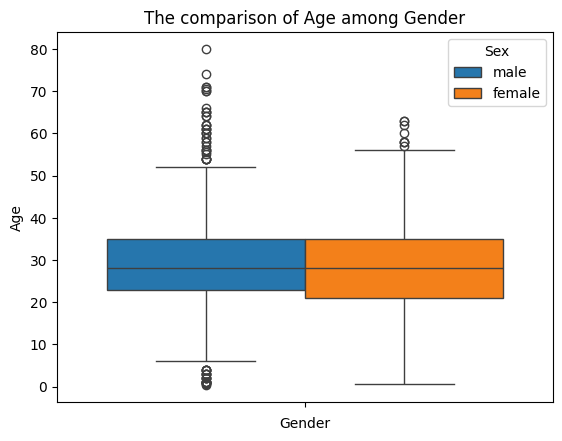

In [102]:
sns.boxplot(y = train["Age"],hue=train["Sex"],saturation=0.90)
plt.title("The comparison of Age among Gender")
plt.xlabel("Gender")
plt.show()

In [108]:
app = train.groupby(["Sex","Embarked"])["Fare"].mean().round(2).reset_index()
app

Sex Embarked   Fare
0  female        C  75.17
1  female        Q  12.63
2  female        S  39.14
3    male        C  48.26
4    male        Q  13.84
5    male        S  21.71

In [109]:
px.bar(x = app["Embarked"], y = app["Fare"],color=app["Sex"],title="The distribution of Fare across Gender and Embarked", barmode="group")

In [74]:
group = train.groupby(["Embarked", "Sex"])[["Age","Fare"]].mean().reset_index().sort_values("Age")

In [79]:
px.line(x = group["Age"], y = group["Fare"], color=group["Sex"],labels=None,title="Linear Relationship of Fare with Age")

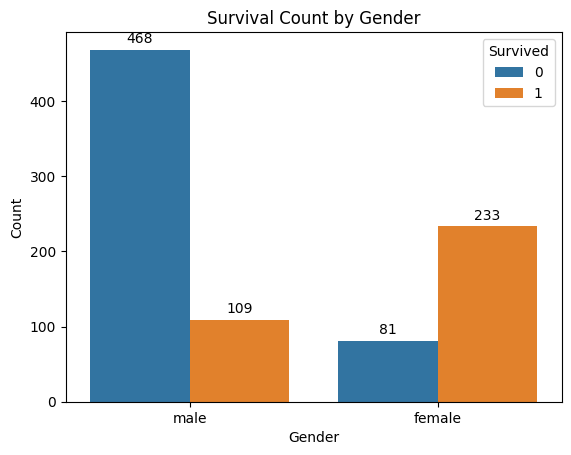

In [94]:
fig = sns.countplot(x=train["Sex"], hue=train["Survived"].astype(str))

# Add count labels on top of bars
for container in fig.containers:
    fig.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [17]:
# Encode categorical variables
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

In [19]:
X_train = train.drop(columns=['Name'])
X_test  = test.drop(columns=['Name'])


# spliting dataset

In [20]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
X_train.dtypes


Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object

converting all columns to integer

In [22]:
bool_cols = X_train.select_dtypes(include='bool').columns

X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols]  = X_test[bool_cols].astype(int)


In [24]:
# HARD DROP Name
if 'Name' in X_train.columns:
    X_train = X_train.drop(columns=['Name'])
    X_test  = X_test.drop(columns=['Name'])


converting boolean into integer

In [26]:
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols]  = X_test[bool_cols].astype(int)


# normalize

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.8101
Decision Tree: Accuracy = 0.7765
Random Forest: Accuracy = 0.8101
KNN: Accuracy = 0.8045
SVM: Accuracy = 0.8212


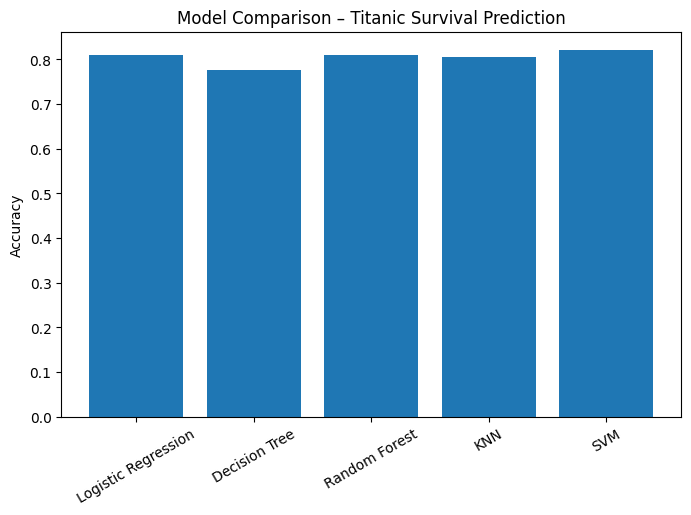

In [30]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison – Titanic Survival Prediction")
plt.xticks(rotation=30)
plt.show()

In [31]:


results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df


Accuracy
SVM                  0.821229
Logistic Regression  0.810056
Random Forest        0.810056
KNN                  0.804469
Decision Tree        0.776536

# voting (combining all model)

In [32]:
from sklearn.ensemble import VotingClassifier


In [33]:
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='hard'  # 'soft' works if all models support predict_proba
)

voting_clf.fit(X_train, y_train)
y_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_voting)
print(f"Voting Classifier Accuracy: {voting_acc:.4f}")


Voting Classifier Accuracy: 0.8212


In [34]:
!mkdir -p /content/drive/MyDrive/models


The syntax of the command is incorrect.


In [36]:
from joblib import dump

dump(voting_clf, r"C:\Users\branc\Desktop\project\titanic_best_model.joblib")


['C:\\Users\\branc\\Desktop\\project\\titanic_best_model.joblib']

# creating the API

In [40]:
from fastapi import FastAPI
from joblib import load
import numpy as np  # Needed for np.array

# Initialize API
app = FastAPI()

# Load model
model = load(r"C:\Users\branc\Desktop\project/titanic_best_model.joblib")

# Define API route for prediction
@app.post("/predict")
def predict(data: dict):
    """
    Example JSON input:
    {
      "Pclass": 3,
      "Sex": 1,
      "Age": 22,
      "SibSp": 1,
      "Parch": 0,
      "Fare": 7.25,
      "Embarked_Q": 0,
      "Embarked_S": 1
    }
    """
    features = np.array([[
        data["Pclass"],
        data["Sex"],
        data["Age"],
        data["SibSp"],
        data["Parch"],
        data["Fare"],
        data["Embarked_Q"],
        data["Embarked_S"]
    ]])

    prediction = model.predict(features)[0]  # Fixed indentation
    return {"Survived": int(prediction)}


In [ ]:
# Install FastAPI and uvicorn if not installed
#!pip install fastapi uvicorn nest_asyncio pyngrok joblib

# Imports
from fastapi import FastAPI
from joblib import load
import numpy as np
import nest_asyncio
from pyngrok import ngrok

# Apply nest_asyncio to allow running FastAPI in notebook
nest_asyncio.apply()

# Initialize FastAPI
app = FastAPI()

# Load model
model = load(r"C:\Users\branc\Desktop\project\titanic_best_model.joblib")

# Define prediction route
@app.post("/predict")
def predict(data: dict):
    features = np.array([[
        data["Pclass"],
        data["Sex"],
        data["Age"],
        data["SibSp"],
        data["Parch"],
        data["Fare"],
        data["Embarked_Q"],
        data["Embarked_S"]
    ]])
    prediction = model.predict(features)[0]
    return {"Survived": int(prediction)}

# Expose API with ngrok
from pyngrok import ngrok

ngrok.set_auth_token("38TiWwMyNvzqrtwUzyFnMDvUaiU_6dT1pcfk7mrURW6L8gyCf")

public_url = ngrok.connect(8000)
print(f"Your public API URL is: {public_url}")

# Run FastAPI app
import uvicorn
import asyncio

config = uvicorn.Config(
    app,
    host="0.0.0.0",
    port=8000,
    log_level="info"
)

server = uvicorn.Server(config)

asyncio.create_task(server.serve())


Your public API URL is: NgrokTunnel: "https://lilied-exiguously-tesha.ngrok-free.dev" -> "http://localhost:8000"


<Task pending name='Task-4' coro=<Server.serve() running at C:\Users\branc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\uvicorn\server.py:69>>

INFO:     Started server process [17988]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('0.0.0.0', 8000): [winerror 10048] only one usage of each socket address (protocol/network address/port) is normally permitted
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


: 

<Task pending name='Task-1' coro=<Server.serve() running at C:\Users\branc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\uvicorn\server.py:69>>

INFO:     Started server process [17988]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
